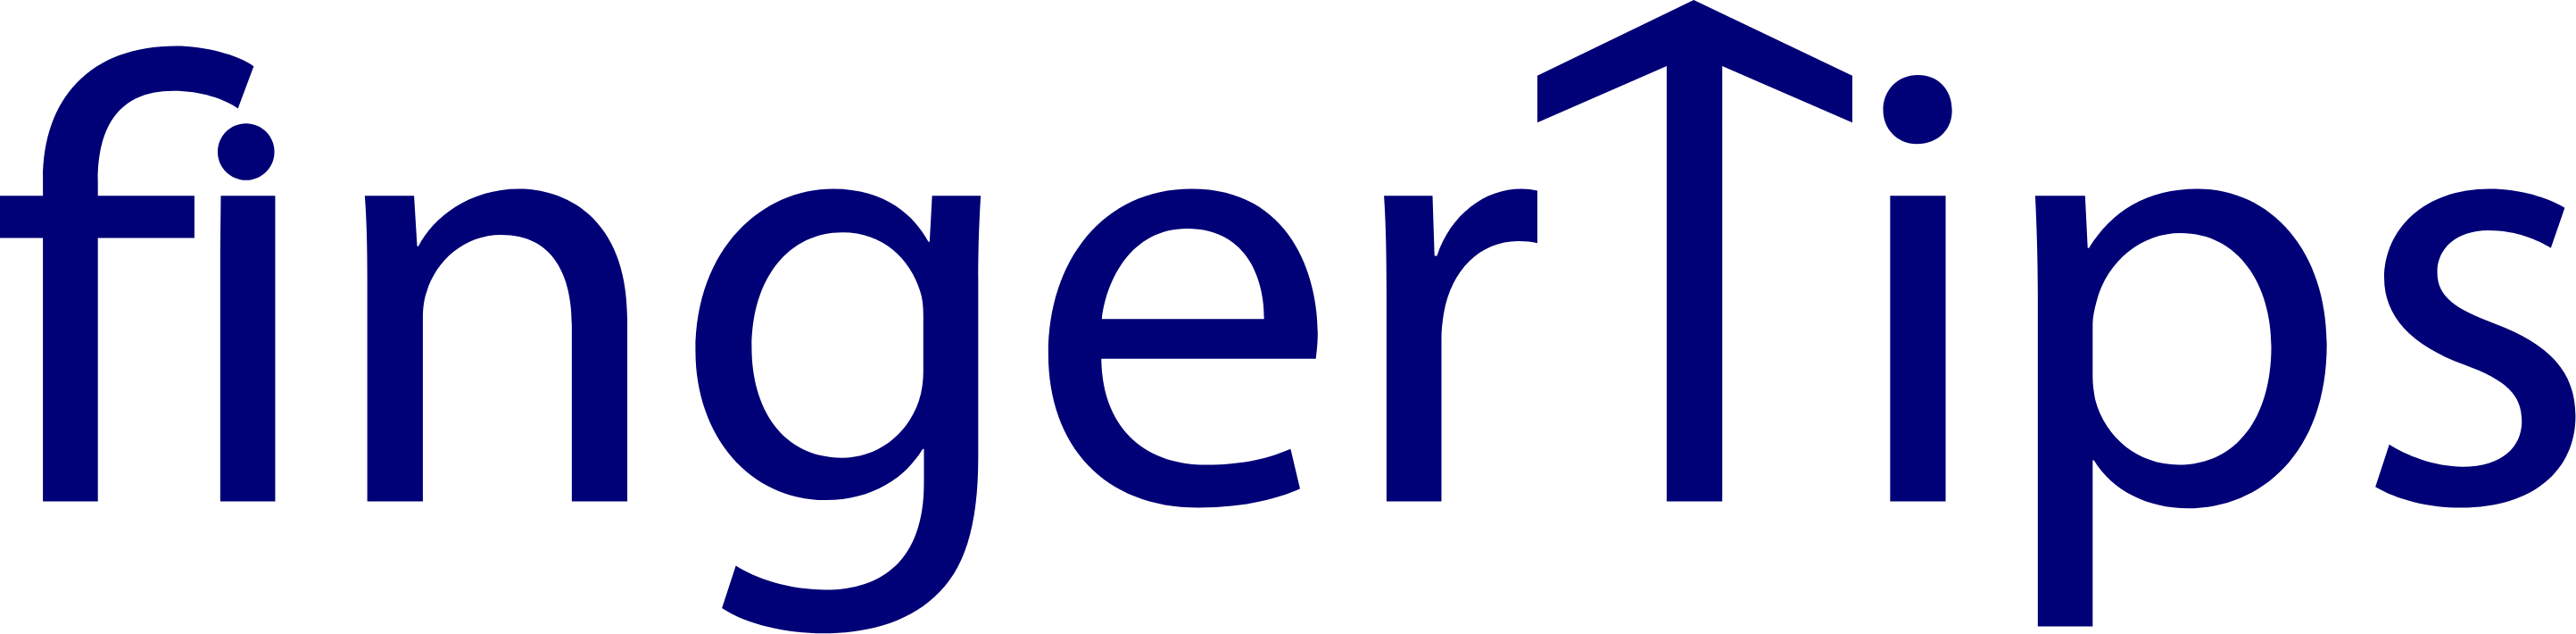

# DISCRIPTIVE STATISTICS

### Measure of Center
1. mean
2. median
3. mode

### Measure of Dispersion
1. range
2. Standard Deviation
3. Varaince
4. Quartiles
5. Inter Quartile Range

CLT 

Outliers

Skewness 

Kurtosis

Correlation

## Data Description

The mtcars dataset is a built-in dataset in R that contains measurements on 11 different attributes for 32 different cars.

1. 'Unnamed: 0'-->car types-->string
2. 'mpg'-->Miles per gallon is the determinant of fuel efficiency-->continuous
3. 'cyl'-->Number of cylinders-->nominal
4. 'disp'-->displacement-->continuous
5. 'hp'-->hourse power-->continuous
6. 'drat'-->	The rear axle gear ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle-->continuous
7. 'wt'-->The overall weight of the vehicle per 1000lbs (half US ton)-->continuous
8. 'qsec'-->Fastest time to travel 1/4 mile from standstill (in seconds).-->continuous
9. 'vs'-->Binary variable signaling the engine cylinder configuration a V-shape (vs=0) or Straight Line (vs=1).-->binary
10. 'am'-->A binary variable signaling whether vehicle has automatic (am=0) or manual (am=1) transmission configuration.-->binary
11. 'gear'-->Number of gears in the transmission. Manual transmissions have either 4 or 5 forward gears; Automatic either 3 or 4-->discrete
12. 'carb'-->number of carburators-->discrete

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv('mtcars.csv')
df.sample(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1


#### Shape & Size of data

In [3]:
df.shape

(32, 12)

##### Observations : 
1. Number of rows = 32
2. Number of columns = 12

#### Column names

In [4]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

#### Data Types

In [5]:
df.dtypes

Unnamed: 0     object
mpg           float64
cyl             int64
disp          float64
hp              int64
drat          float64
wt            float64
qsec          float64
vs              int64
am              int64
gear            int64
carb            int64
dtype: object

#### Null values

In [6]:
df.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

#### Duplicated values

In [7]:
df.duplicated().sum()

0

##### Observations :
1. there are no null values
2. there is no duplicated data

#### Categorical & Numerical Features

In [8]:
cat_fea=['cyl', 'vs', 'am', 'gear', 'carb']
num_fea=['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']

## Categorical Features

#### Value counts of categorical features

In [9]:
for col in cat_fea:
    print(f'{col}\n{df[col].value_counts()}')
    

cyl
8    14
4    11
6     7
Name: cyl, dtype: int64
vs
0    18
1    14
Name: vs, dtype: int64
am
0    19
1    13
Name: am, dtype: int64
gear
3    15
4    12
5     5
Name: gear, dtype: int64
carb
4    10
2    10
1     7
3     3
6     1
8     1
Name: carb, dtype: int64


### Mode
The most frequent value in a feature is called mode.

In [10]:
df[cat_fea].mode()

,cyl,vs,am,gear,carb
0,8.0,0.0,0.0,3.0,2
1,NaN,NaN,NaN,NaN,4


#### Observation :
1. most frequent values in "cyl", "vs", "am", "gear" are 8, 0, 0, 3 respectively
2. "carb" is the only feature having same maximum frequncy counts for 2 and 4
3. These most frequent values are known as mode, and are useful to impute null values for categorical features. In curent data we fortunately don't have null values, if we had we could have replaced by these

In [11]:
cat_fea

['cyl', 'vs', 'am', 'gear', 'carb']

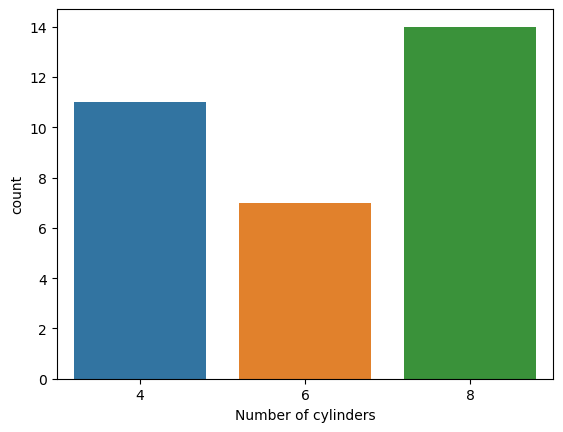

In [12]:
sns.countplot(data=df, x='cyl')
plt.xlabel('Number of cylinders')
plt.show()

#### Observations : 
1. most of the cars have 8 cylinders and least cars are available with 6 cylinders

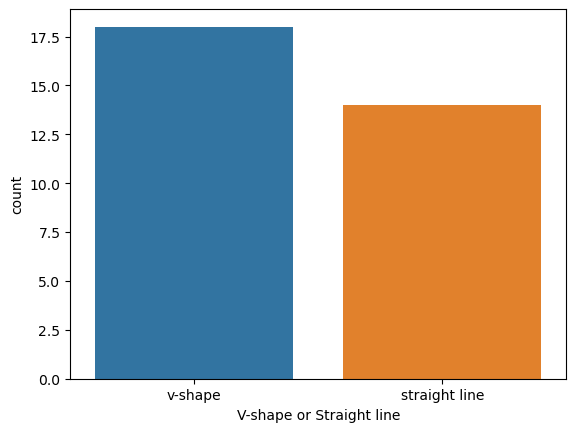

In [13]:
sns.countplot(data=df, x='vs')
plt.xlabel('V-shape or Straight line')
plt.xticks(ticks=[0,1], labels=['v-shape', 'straight line'])
plt.show()
#'v-shape'(vs=0), 'straight line'(vs=1)

#### Observations : 
1. It is clear 0 is the most frequent value of vs
2. So if there were null values present for this feature, we would have imputed them with mode
3. Data looks approximately balanced so there won't be need of balancing data

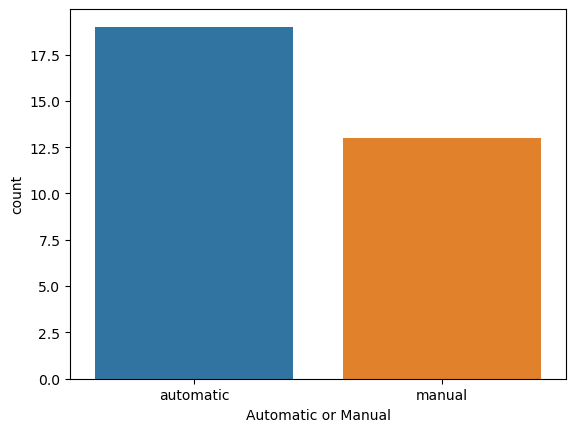

In [14]:
sns.countplot(data=df, x='am')
plt.xlabel('Automatic or Manual')
plt.xticks(ticks=[0,1], labels=['automatic', 'manual'])
plt.show()
#manual(am=1), automatic(am=0)

#### Observations : 
1. It is clear 0 is the most frequent value of am
2. So if there were null values present for this feature, we would have imputed them with mode
3. Data looks approximately balanced so there won't be need of balancing data

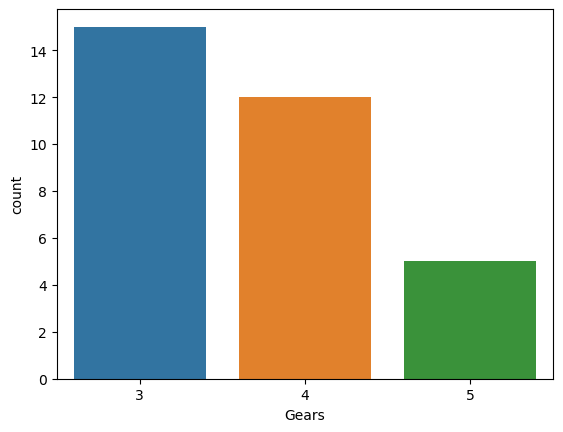

In [15]:
sns.countplot(data=df, x='gear')
plt.xlabel('Gears')
plt.show()

#### Observations : 
1. Most of the cars have 3 forward gears, and there are very less number of cars having 5 gears in it
2. So if there were null values present for this feature, we would have imputed them with mode

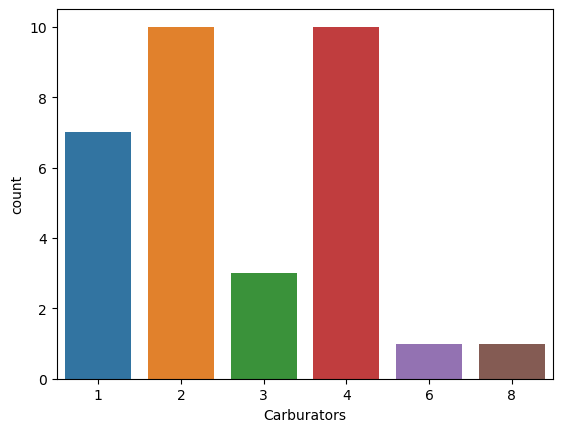

In [16]:
sns.countplot(data=df, x='carb')
plt.xlabel('Carburators')
plt.show()

#### Observations : 
1. Most of the cars have 2 or 4 carburators, and there are very less number of cars having 6 or 8 carburators in it
2. there are no cars having 5 or 7 carburators
2. So if there were null values present for this feature, we would have imputed them with mode

## Numerical Features

### Mean

In [17]:
df[num_fea].mean()

mpg      20.090625
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
dtype: float64

### Median

In [18]:
df[num_fea].median()

mpg      19.200
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
dtype: float64

### Let's Understand Mean, Median & Mode in a more simpler way...

###### Mean
Let's take an example of a small town of Gujrat with a population of 10 persons, salaries per month of all is given by **salary1**. If I ask, what is the average salary of persons of this town?

In [98]:
#MEAN
salary1=[10000, 15000, 12000, 14500, 13000, 15000, 13500, 18000, 20000, 17000]
salary1=pd.DataFrame(salary1)
print(f'Mean = {salary1[0].mean()}\nMedian = {salary1[0].median()}\nMode = {salary1[0].mode()}')

Mean = 14800.0
Median = 14750.0
Mode = 0    15000
Name: 0, dtype: int64


<AxesSubplot:xlabel='0'>

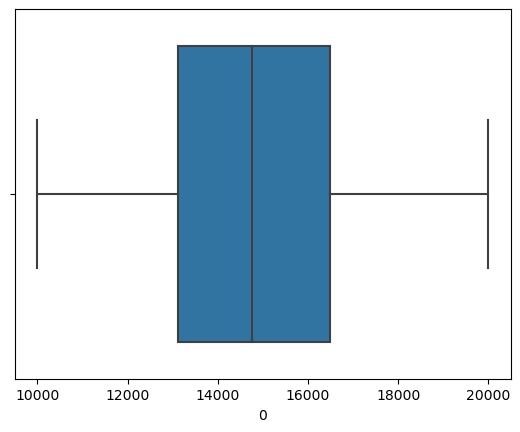

In [99]:
sns.boxplot(data=salary1, x=0)

##### Observations:
1. There are no outliers, mean, median and mode are approximately equal. 
2. So we can say here **mean(14800)** best represents the salary of all persons 
3. This represents that if we have some missing value, we can replace it by **mean**

###### Median
Imagine 2 outliers(The Silent Killer) **Mukesh Ambani(salary=50000) and Bill Gates(salary=100000)** comes to live in the same village, now let's find out which measure represents salary of population of that village. salary2 consists of salaries per month of all 12 persons.

In [131]:
#MEDIAN
salary2=[10000, 15000, 12000, 14500, 13000, 15000, 13500, 18000, 20000, 17000, 50000, 100000]
salary2=pd.DataFrame(salary2)
print(f'Mean = {salary2[0].mean()}\nMedian = {salary2[0].median()}\nMode = {salary2[0].mode()}')

Mean = 24833.333333333332
Median = 15000.0
Mode = 0    15000
Name: 0, dtype: int64


<AxesSubplot:xlabel='0'>

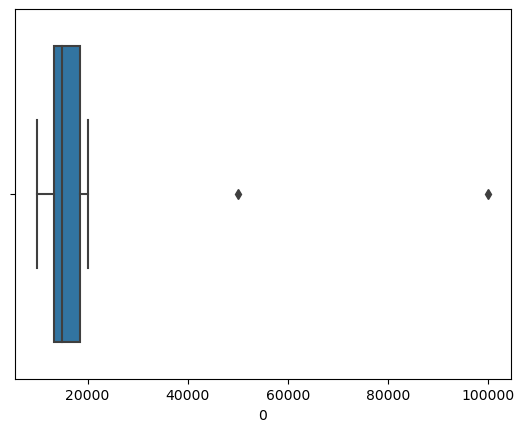

In [115]:
sns.boxplot(data=salary2, x=0)

##### Observations:
1. There are 2 outliers, median and mode are equal, but this time mean is shifted towards higher values and is very different from median/mode. 
2. So median(15000) here is the best value which represnts salary of persons of that town
3. So if we have some missing value in this case we can replace it by **median**

##### let's remove outliers

In [132]:
#MEDIAN
salary2=salary2[salary2[0]<=salary2[0].mean()]
print(f'Mean = {salary2[0].mean()}\nMedian = {salary2[0].median()}\nMode = {salary2[0].mode()}')

Mean = 14800.0
Median = 14750.0
Mode = 0    15000
Name: 0, dtype: int64


<AxesSubplot:xlabel='0'>

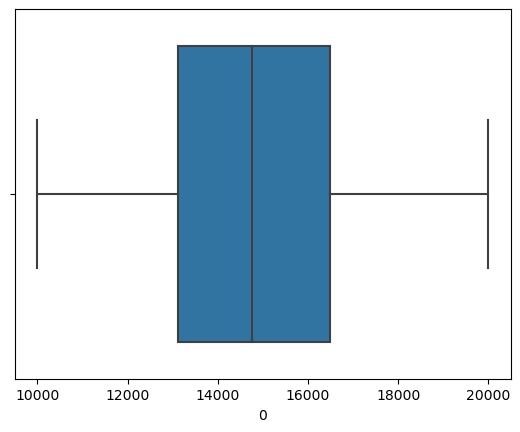

In [121]:
sns.boxplot(data=salary2, x=0)

##### Observations:
1. Now after removing outliers, mean, median and mode are approximately equal. 
2. So we can say here **mean(14800)** best represents the salary of all persons 
3. This represents that if we have some missing value, we can replace it by **mean**

###### Mode
Now suppose 5 among those 10 have same level of experience and made a transition into data-science. Now if we want best represntative salary value, that can be mode

In [134]:
#MODE
salary3=[20000, 14550, 12500, 18500, 13000, 15000, 13500, 12000, 20000, 14000]
salary3=pd.DataFrame(salary3)
print(f'Mean = {salary3[0].mean()}\nMedian = {salary3[0].median()}\nMode = {salary3[0].mode()}')

Mean = 15305.0
Median = 14275.0
Mode = 0    20000
Name: 0, dtype: int64


<AxesSubplot:xlabel='0'>

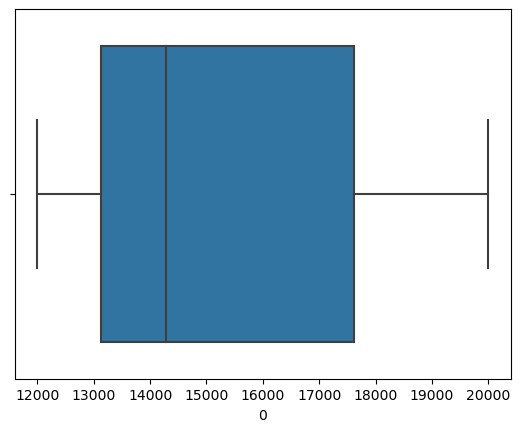

In [135]:
sns.boxplot(data=salary3, x=0)

##### Observations:
1. the best value which represnts salary of population of that town is 20000
2. So if we have some missing value in this case we can replace it by **mode=20000**

###### Mode

Now suppose 8 among those 10 are males adn rest are feamles. Now which one best represents the population.
Obviously, males...but let's see this with visualization

In [109]:
#MODE-Categorical data
gender=['Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male']
gender=pd.DataFrame(gender)

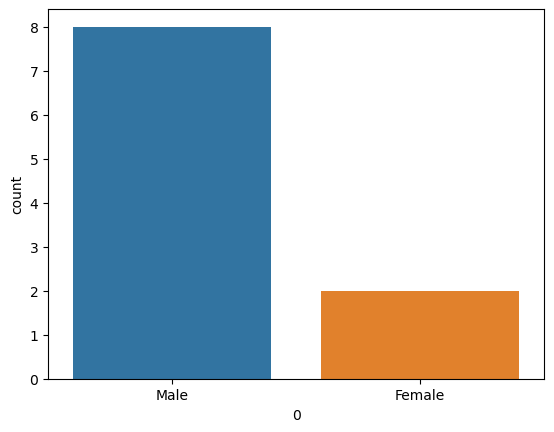

In [110]:
sns.countplot(data=gender, x=0)
#plt.xlabel('Carburators')
plt.show()

##### Observations:
1. the best value which represnts population of that town is "male"
2. So if we have some missing value in this case we can replace it by **mode="male"**

### Standard deviation

In [19]:
df[num_fea].std()

mpg       6.026948
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
dtype: float64

### Variance
variance is nothing but the square of mean

In [20]:
df[num_fea].var()

mpg        36.324103
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
dtype: float64

### Range

In [21]:
#range=max-min
df[num_fea].max()-df[num_fea].min()

mpg      23.500
disp    400.900
hp      283.000
drat      2.170
wt        3.911
qsec      8.400
dtype: float64

### Statistical Description of Numerical Features

In [22]:
num_fea

['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']

In [23]:
df[num_fea].describe()
#50%-->median

,mpg,disp,hp,drat,wt,qsec
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,230.721875,146.687500,3.596563,3.217250,17.848750
std,6.026948,123.938694,68.562868,0.534679,0.978457,1.786943
min,10.400000,71.100000,52.000000,2.760000,1.513000,14.500000
25%,15.425000,120.825000,96.500000,3.080000,2.581250,16.892500
50%,19.200000,196.300000,123.000000,3.695000,3.325000,17.710000
75%,22.800000,326.000000,180.000000,3.920000,3.610000,18.900000
max,33.900000,472.000000,335.000000,4.930000,5.424000,22.900000


## Probability Distributions and skewness

#### Uniform Distribution
Not exactly but sort of

Text(0.5, 0, 'drat')

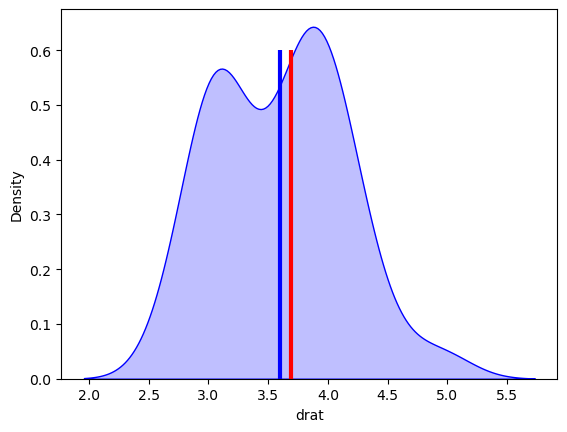

In [24]:
sns.kdeplot(data=df, x='drat', shade=True, color='blue')
plt.vlines(df['drat'].mean(), ymin=0, ymax=0.6, linewidth=3.0, color='blue')
plt.vlines(df['drat'].median(), ymin=0, ymax=0.6, linewidth=3.0, color='red')
plt.xlabel('drat')

##### Observations :
1. Looks like sort of uniform distribution

#### Right Skewed Distribution

Text(0.5, 0, 'mpg')

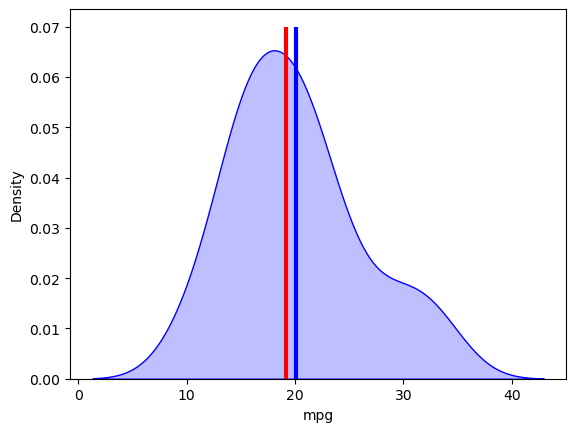

In [25]:
sns.kdeplot(data=df, x='mpg', shade=True, color='blue')
plt.vlines(df['mpg'].mean(), ymin=0, ymax=0.07, linewidth=3.0, color='blue')
plt.vlines(df['mpg'].median(), ymin=0, ymax=0.07, linewidth=3.0, color='red')
plt.xlabel("mpg")

##### Observations :
1. since mean slightly > median, mpg seems to be right skewed
2. There are very few cars having very high miles per gallon 
3. most of the cars have miles per gallon around 20
4. if there were null values, we could have replaced them by median

Text(0.5, 0, 'disp')

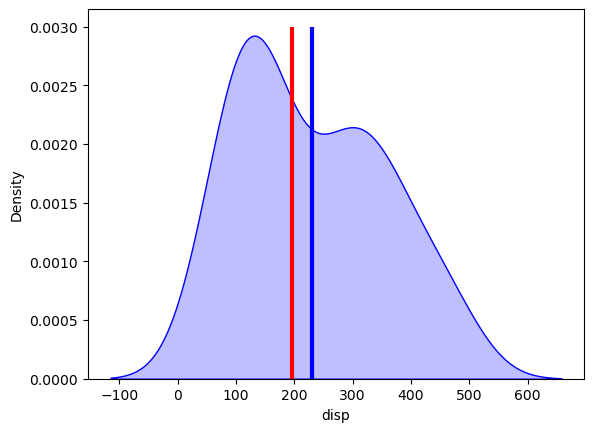

In [26]:
sns.kdeplot(data=df, x='disp', shade=True, color='blue')
plt.vlines(df['disp'].mean(), ymin=0, ymax=0.003, linewidth=3.0, color='blue')
plt.vlines(df['disp'].median(), ymin=0, ymax=0.003, linewidth=3.0, color='red')
plt.xlabel("disp")

##### Observations :
1. since mean slightly > median, displacement seems to be right skewed
2. There are very few cars having very high displacement around 600
3. most of the cars have displacement around 200
4. if there were null values, we could have replaced them by median

Text(0.5, 0, 'hp')

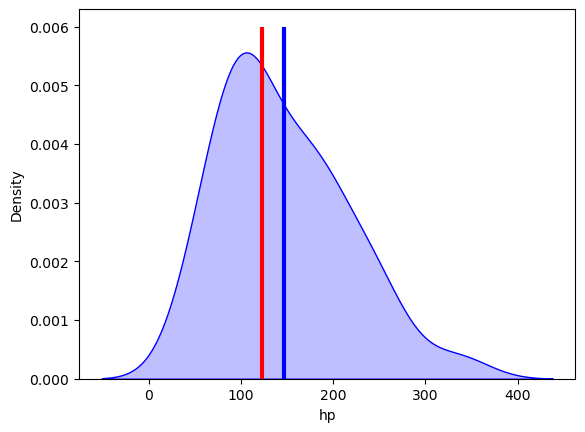

In [27]:
sns.kdeplot(data=df, x='hp', shade=True, color='blue')
plt.vlines(df['hp'].mean(), ymin=0, ymax=0.006, linewidth=3.0, color='blue')
plt.vlines(df['hp'].median(), ymin=0, ymax=0.006, linewidth=3.0, color='red')
plt.xlabel("hp")

##### Observations :
1. since mean slightly > median, hourse power seems to be right skewed
2. There are very few cars having very hourse power
3. most of the cars have hourse power value around 110
4. if there were null values, we could have replaced them by median

#### Left Skewed Distribution

Text(0.5, 0, 'wt')

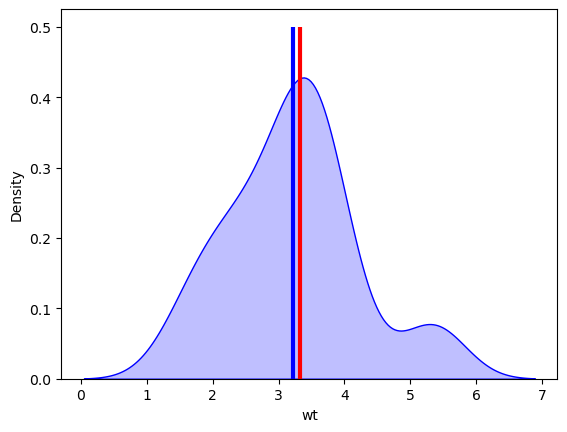

In [28]:
sns.kdeplot(data=df, x='wt', shade=True, color='blue')
plt.vlines(df['wt'].mean(), ymin=0, ymax=0.5, linewidth=3.0, color='blue')
plt.vlines(df['wt'].median(), ymin=0, ymax=0.5, linewidth=3.0, color='red')
plt.xlabel("wt")

##### Observations :
1. since mean slightly < median, weight seems to be left skewed
2. There are very few cars having very less weight 
3. most of the cars have weight around 3.2
4. if there were null values, we could have replaced them by median

#### Symmetrical Distribution

Text(0.5, 0, 'qsec')

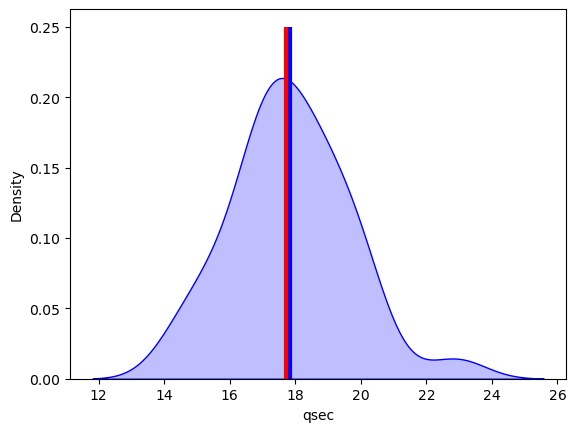

In [29]:
sns.kdeplot(data=df, x='qsec', shade=True, color='blue')
plt.vlines(df['qsec'].mean(), ymin=0, ymax=0.25, linewidth=3.0, color='blue')
plt.vlines(df['qsec'].median(), ymin=0, ymax=0.25, linewidth=3.0, color='red')
plt.xlabel("qsec")

##### Observations :
1. since mean=median, qsec seems to be normally distributed
2. There are very few cars having average ime for 0.25 mile very less are very high
3. most of the cars have time for 0.25 mile around 18 
4. if there were null values, we could have replaced them by mean or median

### How a normally distibuted data looks like?

Text(0.5, 0, 'Normal Distribution')

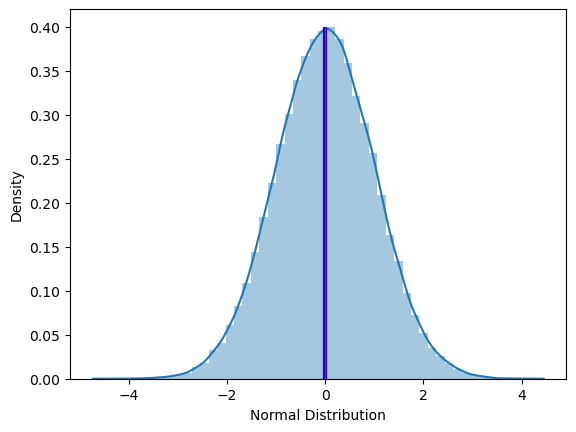

In [30]:
import scipy.stats as stats
rvs = stats.norm(scale=1, loc=0).rvs(100000)
rvs=pd.DataFrame(rvs)
sns.distplot(rvs)
plt.vlines(rvs.mean(), ymin=0, ymax=0.40, linewidth=3.0, color='blue')
plt.vlines(rvs.median(), ymin=0, ymax=0.40, linewidth=1.0, color='red')
plt.xlabel("Normal Distribution")

##### Observations:
1. Mean=Median

## Central Limit Theorem(CLT)

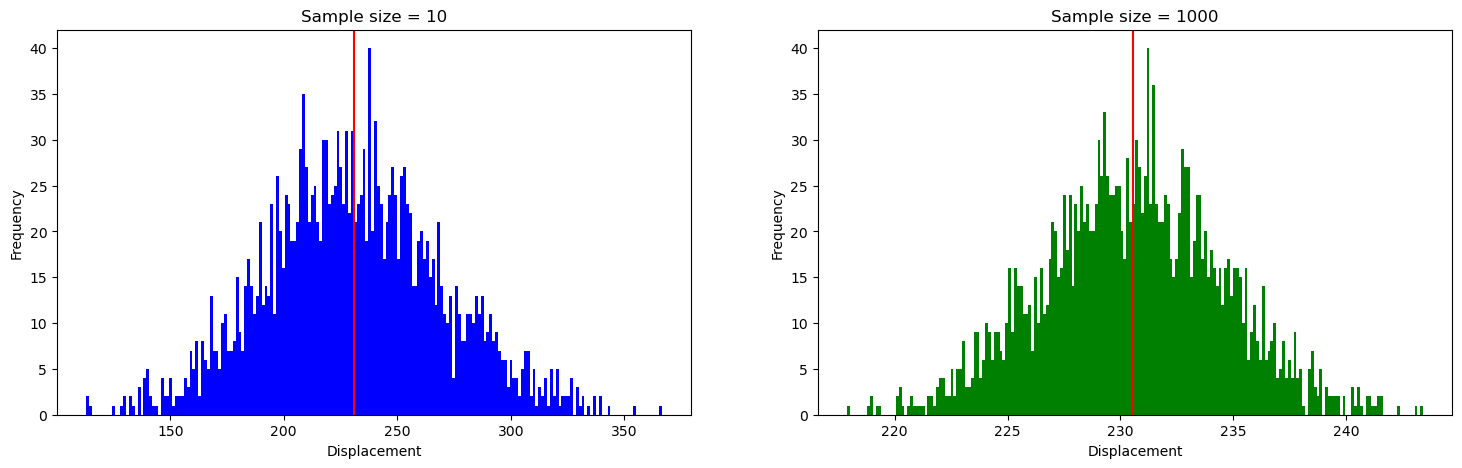

In [31]:
#We will take sample size=10 and 1000 samples=2000
#Calculate the arithmetice mean and plot the mean of sample 300 times

array1 = []
array2 = []
n = 2000
for i in range(1,n):
    array1.append(df.disp.sample(n=10,replace= True).mean())
    array2.append(df.disp.sample(n=1000,replace= True).mean())

#print(array)
fig , (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(18,5))

#plt.subplot(211)
ax1.hist(array1, bins=200,color='b')
ax1.set_xlabel('Displacement')
ax1.set_ylabel('Frequency')
ax1.set_title('Sample size = 10')
ax1.axvline(x=np.mean(array1),color='r') # for giving mean line

#ax2.subplot(212)
ax2.hist(array2, bins=200, color='g')
ax2.set_xlabel('Displacement')
ax2.set_ylabel('Frequency')
ax2.set_title('Sample size = 1000')
ax2.axvline(x=np.mean(array2),color='r') # for giving mean line


##### Observations:
1. distribution with sample size=10, looks right-skewed
2. distribution on increasing sample size to 1000, approches to normal distribution

**Note:If we wish to make distributions normal, we can apply Central Limit Theorem(CLT)**

### Standard Deviation

Text(0.5, 0, 'drat and wt')

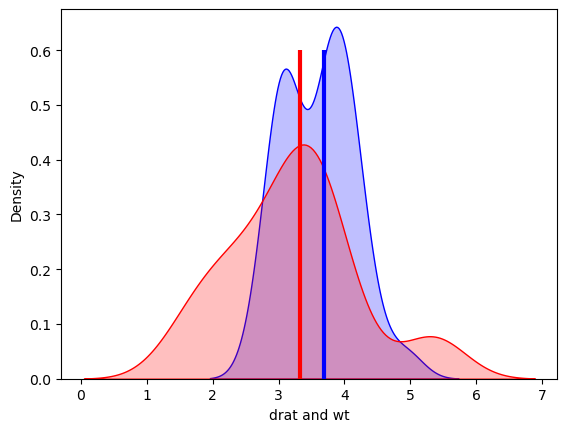

In [32]:
sns.kdeplot(data=df, x='drat', shade=True, color='blue')
sns.kdeplot(data=df, x='wt', shade=True, color='red')
plt.vlines(df['drat'].median(), ymin=0, ymax=0.6, linewidth=3.0, color='blue')
plt.vlines(df['wt'].median(), ymin=0, ymax=0.6, linewidth=3.0, color='red')
plt.xlabel("drat and wt")

#### Observations :
Now let's compare mean and standard deviation of features "drat" and "wt", we observe that:
1. mean, median of both the features is approximately same, also both the features are spread over approximately same range, but standard deviation varires, standard deviation of "drat" is less as compared to that of "wt" means "drat" is less deviated and most of the values are close to mean of "drat".
2. Standard Deviation of "wt" being higher means values of "wt" for cars are far from mean 

### Kurtosis
Distributions with medium kurtosis (medium tails) are mesokurtic.

Distributions with low kurtosis (thin tails) are platykurtic.

Distributions with high kurtosis (fat tails) are leptokurtic.

Text(0.5, 0, 'mpg and qsec')

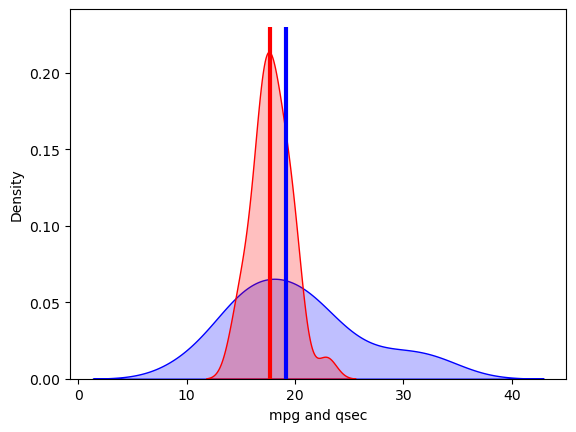

In [33]:
sns.kdeplot(data=df, x='mpg', shade=True, color='blue')
sns.kdeplot(data=df, x='qsec', shade=True, color='red')
plt.vlines(df['mpg'].median(), ymin=0, ymax=0.23, linewidth=3.0, color='blue')
plt.vlines(df['qsec'].median(), ymin=0, ymax=0.23, linewidth=3.0, color='red')
plt.xlabel("mpg and qsec")

#### Observations :
Now let's compare range and standard deviation of features "mpg" and "qsec", we observe that:
1. As mean and median of both the features are almost equal so we can see data is normally distribued.
2. Standard Deviation of "mpg" being higher means values of "mpg" for cars are far from mean 
3. Both the features are spread over different ranges, as the range of "mpg" is greater than that of "qsec" also standard deviation varires, standard deviation of "mpg" is greater as than that of "qsec" means "mpg" has low kurtosis or we can say peakness and values are very far from the average value of "mpg" whereas we can see the case is just opposite in "qsec".
4. Hence "mpg" is "platykurtic"(low kurtosis) whereas "qsec" is "leptokurtic"(high kurtosis). 

### Skewness

Text(0.5, 0, 'disp and hp')

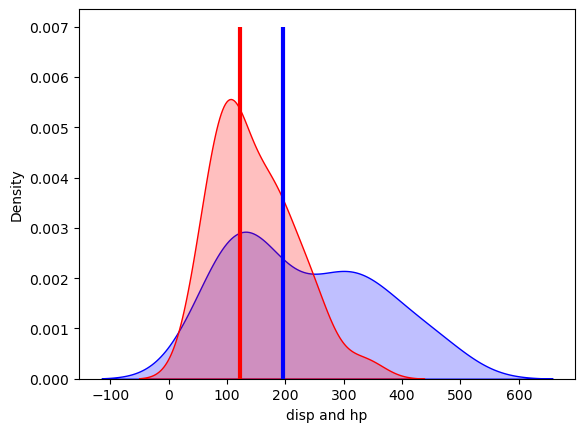

In [34]:
sns.kdeplot(data=df, x='disp', color='blue', shade=True)
sns.kdeplot(data=df, x='hp', color='red', shade=True)
plt.vlines(df['disp'].median(), ymin=0, ymax=0.007, linewidth=3.0, color='blue')
plt.vlines(df['hp'].median(), ymin=0, ymax=0.007, linewidth=3.0, color='red')
plt.xlabel("disp and hp")

#### Observation :
1. Mean and Median of "hp" are approximately same so, data seems to be normally distributed for feature "hp"
2. Mean of "disp" is very high as compared to its median so, data seems to be right skewed means there are very few values cars having extremely high value of "disp".

### Why there is need to find Mean, Median and Mode?

In present case we do not have null values, 

central tendency is a descriptive summary of a dataset through a single value that reflects the center of the data distribution, say if it was there, then central tendency is sometimes used to impute those null values, now which one to choose dependes upon the type of data, like : 
1. for continuous variable which is normally distributed then we can apply mean
2. for continuous variable which is skewed then we can apply median as median is not influenced by skewed values
3. for categorical variables it will be better to use mode that is most frequent value

### Quartiles & Interquartile range
Mostly used to check if outliers are present in data

Interquartile range is the difference between 3rd quartile and 1st quartile

In [35]:
num_fea

['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']

In [36]:
df[num_fea].describe().T[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
mpg,10.400,15.42500,19.200,22.80,33.900
disp,71.100,120.82500,196.300,326.00,472.000
hp,52.000,96.50000,123.000,180.00,335.000
drat,2.760,3.08000,3.695,3.92,4.930
wt,1.513,2.58125,3.325,3.61,5.424
qsec,14.500,16.89250,17.710,18.90,22.900


## Outliers

Text(0.7, 18.5, 'IQR')

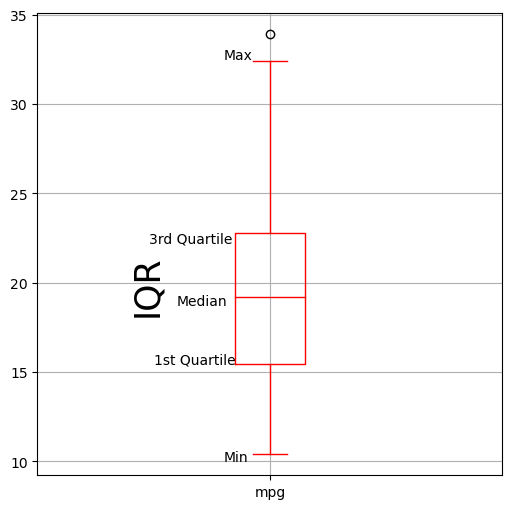

In [37]:
df.boxplot(column="mpg",
               return_type='axes',
               figsize=(6,6), color='red')

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=32.5, s="Max")
plt.text(x=0.7, y=18.5, s="IQR", rotation=90, size=25)

#### Observations :
1. "mpg" : we can clearly see that there is right outlier present

<AxesSubplot:xlabel='disp'>

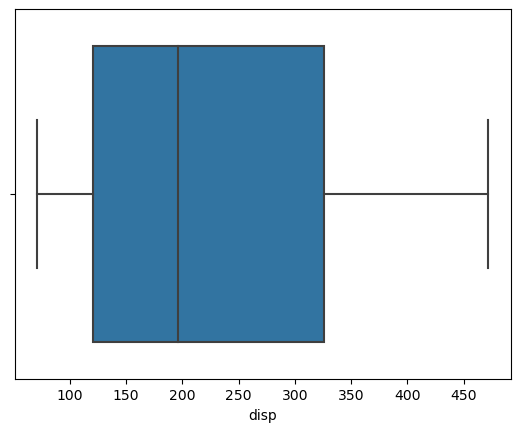

In [38]:
sns.boxplot(data=df, x="disp")

#### Observations :
1. "disp" : there are no outliers present
2. Most of the values are greater that 50 percentile
2. since the area between median and 3rd quartile is bigger, it means data is right skewed

<AxesSubplot:xlabel='hp'>

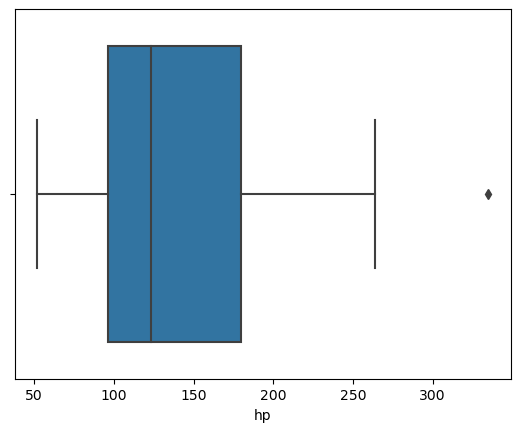

In [39]:
sns.boxplot(data=df, x="hp")

#### Observations :
1. "hp" : there is outlier present(only right), it means there is only one car having exceptionally bigger hp
2. since the area between median and 3rd quartile is bigger, it means data is right skewed
3. so, we can handle right outlier by substituting it will maximum value of the feature

<AxesSubplot:xlabel='drat'>

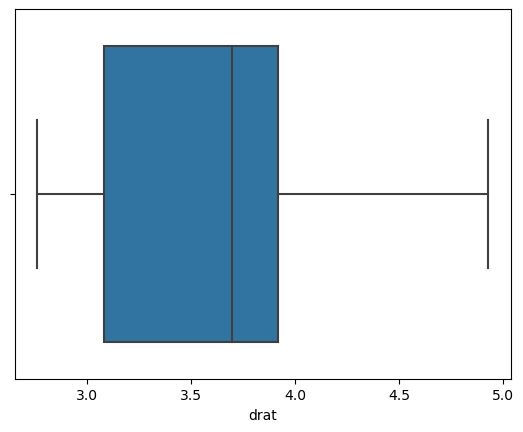

In [40]:
sns.boxplot(data=df, x="drat")

#### Observations :
1. "drat" : there are no outliers present
2. since the area between median and 1rd quartile is bigger, it means data is left skewed

<AxesSubplot:xlabel='wt'>

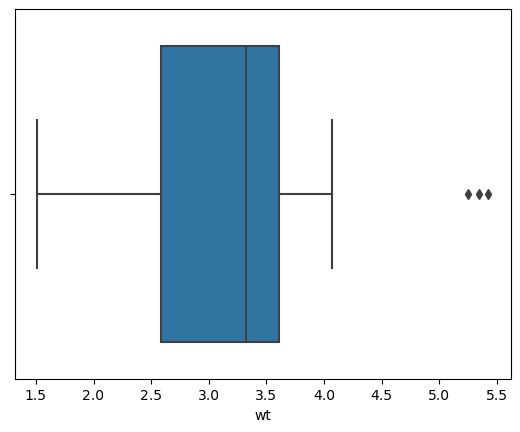

In [41]:
sns.boxplot(data=df, x="wt")

#### Observations :
1. "wt" : there are outliers present(only right outliers), means there seems to be 3 cars having exceptionally bigger value of wt
2. since the area between median and 1rd quartile is bigger, it means data is left skewed
3. we can handle right outlier by substituting it will maximum value of the feature

<AxesSubplot:xlabel='qsec'>

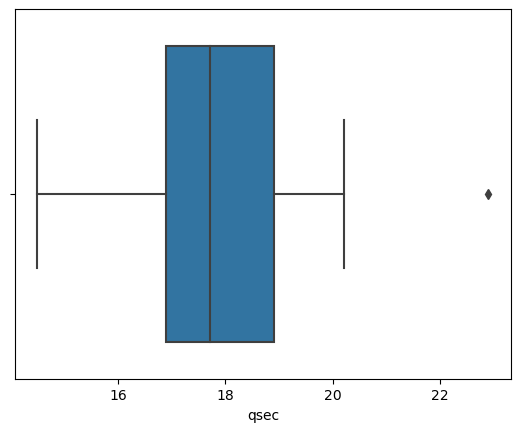

In [42]:
sns.boxplot(data=df, x="qsec")

#### Observations :
1. "qsec" : there is outlier present(only right), it means there is only one car having exceptionally bigger qsec
2. so, we can handle right outlier by substituting it will maximum value of the feature

## Probability Distribution of different feataures of cars by MPG

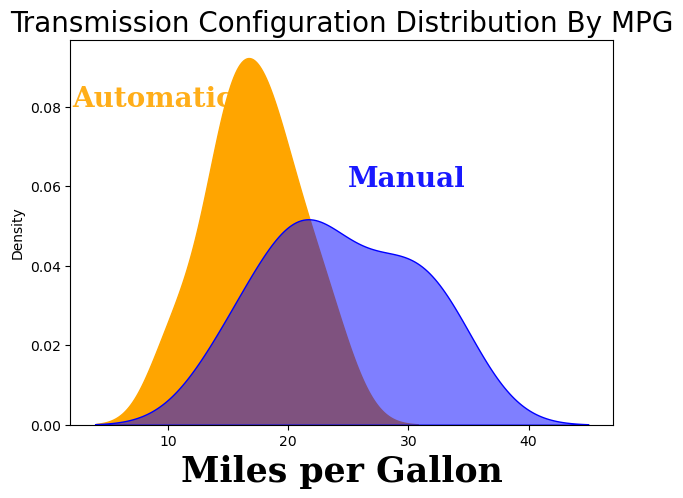

In [43]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
plt.title('Transmission Configuration Distribution By MPG', size=20)

ax.text(2,0.08, 'Automatic', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(25, 0.06, 'Manual', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['am']==0], x='mpg', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['am']==1], x='mpg', shade=True, ax=ax, color='blue', alpha=0.5)

plt.xlabel("Miles per Gallon", {'fontproperties': 'Serif','size': '25','weight': 'bold'})
plt.show()

#### Observations :
1. Probability density of cars being automatic is higher for mpg<=20
2. while probabilty of cars being manual increases on increasing mpg
3. Hence we may conclude that for extremely higher values of mpg, transmission configuration of cars will be manual.

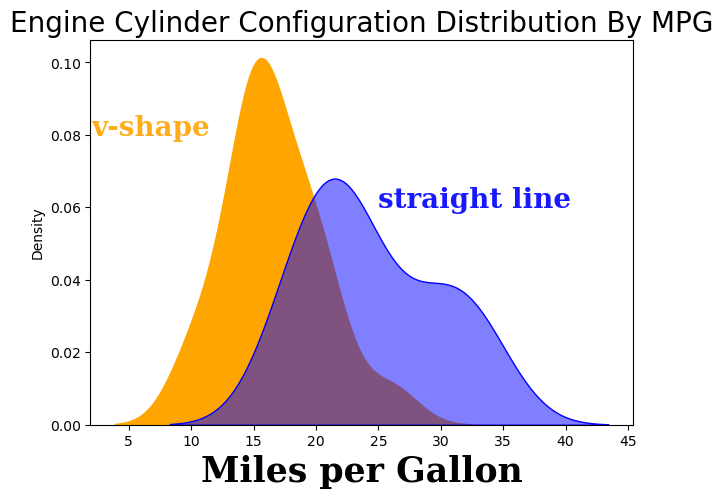

In [44]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
plt.title('Engine Cylinder Configuration Distribution By MPG', size=20)

ax.text(2,0.08, 'v-shape', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(25, 0.06, 'straight line', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['vs']==0], x='mpg', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['vs']==1], x='mpg', shade=True, ax=ax, color='blue', alpha=0.5)

plt.xlabel("Miles per Gallon", {'fontproperties': 'Serif','size': '25','weight': 'bold'})
plt.show()

#### Observations :
1. Probability density of cars having v-shape engine is higher for mpg<=20
2. while probabilty of cars having straight line engine increases on increasing mpg
3. Hence we may conclude that for extremely higher values of mpg, type of engine used in cars will be of straight line kind.

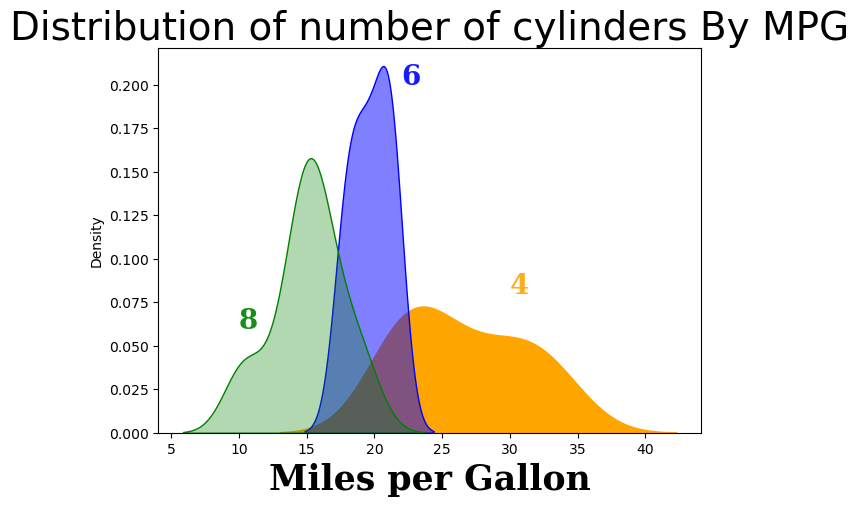

In [45]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
plt.title('Distribution of number of cylinders By MPG', size=28)

ax.text(30,0.08, '4', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(22, 0.2, '6', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)
ax.text(10, 0.06, '8', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'green'}, alpha=0.9)

sns.kdeplot(data=df[df['cyl']==4], x='mpg', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['cyl']==6], x='mpg', shade=True, ax=ax, color='blue', alpha=0.5)
sns.kdeplot(data=df[df['cyl']==8], x='mpg', shade=True, ax=ax, color='green', alpha=0.3)


plt.xlabel("Miles per Gallon", {'fontproperties': 'Serif','size': '25','weight': 'bold'})
plt.show()

#### Observations :
1. Probability density of cars having 8 cylinders is higher for extremely lower values of mpg
2. while probabilty of cars having 6 cylinders is maximum for mpg between 15 and 25
3. Probability density of cars having 4 cylinders is higher for extremely higher values of mpg
3. Hence we may conclude that for extremely higher values of mpg, 4 cylinders are used in cars, while for extremely low values of mpg, 8 cylinders are used

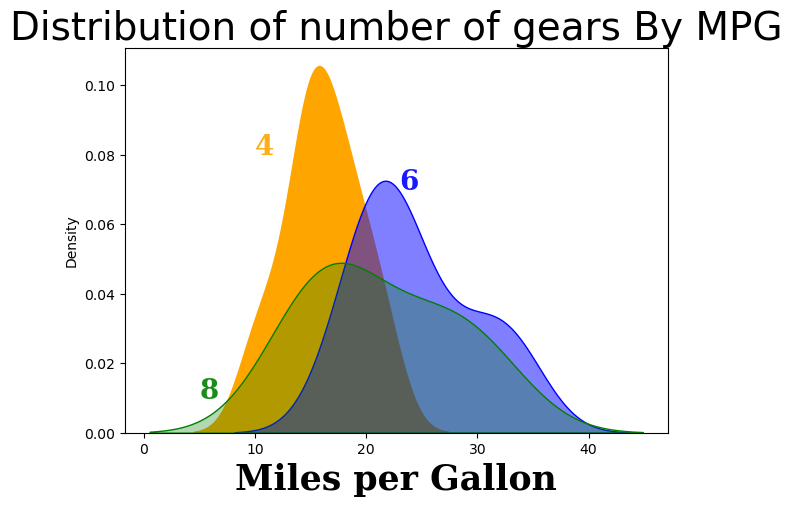

In [46]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
plt.title('Distribution of number of gears By MPG', size=28)

ax.text(10,0.08, '4', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(23, 0.07, '6', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)
ax.text(5, 0.01, '8', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'green'}, alpha=0.9)

sns.kdeplot(data=df[df['gear']==3], x='mpg', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['gear']==4], x='mpg', shade=True, ax=ax, color='blue', alpha=0.5)
sns.kdeplot(data=df[df['gear']==5], x='mpg', shade=True, ax=ax, color='green', alpha=0.3)


plt.xlabel("Miles per Gallon", {'fontproperties': 'Serif','size': '25','weight': 'bold'})
plt.show()

#### Observations :
1. Probability density of cars having 6 gears is higher for extremely higher values of mpg
2. while probabilty of cars having 4 gears is maximum for mpg between 10 to 20
3. Probability density of cars having 8 gears is higher for extremely lower values of mpg
3. Hence we may conclude that for extremely higher values of mpg, 6 gears are used in cars, while for extremely low values of mpg, 8 gears are used

### Covariance & Correlation 

In [3]:
#let's create two lists and calculate covariance between them
x=[1,2,3,4,5]
y=[5,9,14,13,16]

covariance=np.cov(x,y)[0,1]
print(covariance)

6.5


In [7]:
#let's create two lists and calculate correlation between them
x=[1,2,3,4,5]
y=[5,9,14,13,16]

correlation=np.corrcoef(x,y)[0,1]
print(correlation)

0.9357604759733028


##### Observation:
1. covariance is postive means x and y are postively related, but we can't say anything about magnitude
2. correlation is postive means x and y are postively related, and also value is 0.935 which is near 1 means x and y are highly correlated.

### Heatmap to check Correlation

<AxesSubplot:>

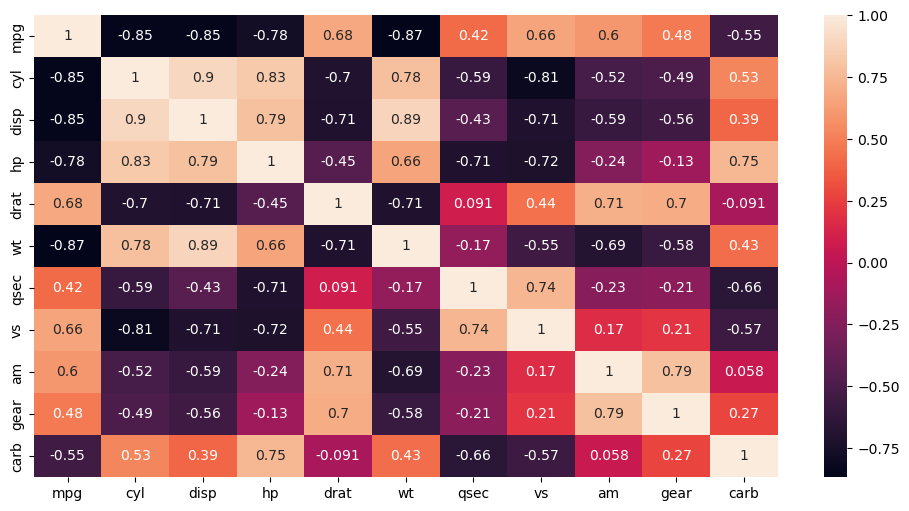

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

#### Observations :
1. mpg is highly positively correlated to drat and vs(engine shape)
2. mpg is highly negatively correlated with wt(weight) and cyl(number of cylinders)
3. cyl has multicollinearity with disp and hp

### Overall Observation:
1. data is highly imbalanced for feature 'Carburators'
2. features like 'mpg', 'disp', 'hp' are right skewed, whereas 'wt' is left skewed and 'qsec' is approximately normally distributed
3. we have applied Central Limit Theorem on 'disp' to make it normal distribution
4. standard deviation of "drat" is less as compared to that of "wt" means "drat" is less deviated and most of the values are close to mean of "drat"
5. "mpg" is "platykurtic"(low kurtosis) whereas "qsec" is "leptokurtic"(high kurtosis).
6. "there seems to be 3 cars having exceptionally bigger value of wt(means outliers)
7. for extremely higher values of mpg, 6 gears are used in cars, while for extremely low values of mpg, 8 gears are used

**END OF DOCUMENT**